In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

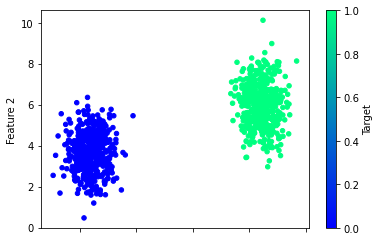

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 938us/step - loss: 0.0687 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 941us/step - loss: 0.0669 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 913us/step - loss: 0.0659 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 938us/step - loss: 0.0651 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 992us/step - loss: 0.0642 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 894us/step - loss: 0.0633 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 946us/step - loss: 0.0625 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 892us/step - loss: 0.0616 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 950us/step - loss: 0.0608 - accuracy

24/24 [==============================] - 0s 922us/step - loss: 0.0257 - accuracy: 1.0000
Epoch 81/100
24/24 [==============================] - 0s 962us/step - loss: 0.0254 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 842us/step - loss: 0.0251 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 885us/step - loss: 0.0248 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 850us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 904us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 848us/step - loss: 0.0240 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 845us/step - loss: 0.0237 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 981us/step - loss: 0.0235 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 862us/step - loss: 0.0232 - accuracy: 

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

<AxesSubplot:>

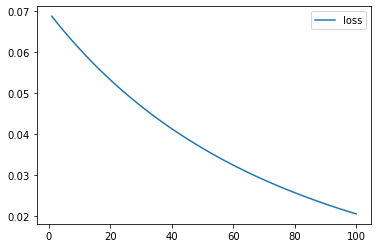

In [17]:
# plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

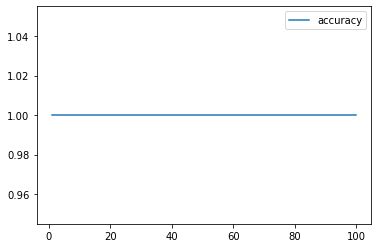

In [18]:
# plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0193 - accuracy: 1.0000 - 132ms/epoch - 16ms/step
Loss: 0.01930573396384716, Accuracy: 1.0


In [22]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [24]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs (n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

predictions = (nn_model.predict(new_X_scaled) > 0.5).astype("int32")

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

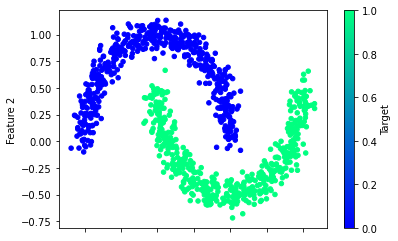

In [25]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [26]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [27]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9850 - accuracy: 0.6520
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8469 - accuracy: 0.6707
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7601 - accuracy: 0.6880
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.6960
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.7053
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7280
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7347
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7413
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7467
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7520
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8920
Epoch 91/100


<AxesSubplot:>

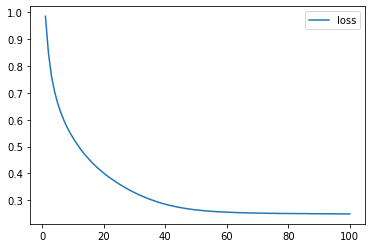

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

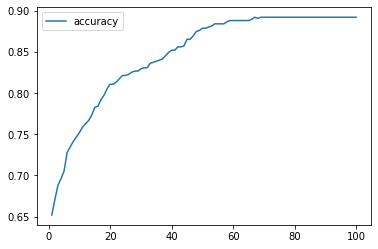

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [31]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [32]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 924us/step - loss: 0.6738 - accuracy: 0.5387
Epoch 2/100
24/24 [==============================] - 0s 975us/step - loss: 0.6269 - accuracy: 0.7320
Epoch 3/100
24/24 [==============================] - 0s 915us/step - loss: 0.5864 - accuracy: 0.8453
Epoch 4/100
24/24 [==============================] - 0s 885us/step - loss: 0.5504 - accuracy: 0.8573
Epoch 5/100
24/24 [==============================] - 0s 909us/step - loss: 0.5179 - accuracy: 0.8707
Epoch 6/100
24/24 [==============================] - 0s 870us/step - loss: 0.4888 - accuracy: 0.8827
Epoch 7/100
24/24 [==============================] - 0s 972us/step - loss: 0.4625 - accuracy: 0.8840
Epoch 8/100
24/24 [==============================] - 0s 909us/step - loss: 0.4387 - accuracy: 0.8893
Epoch 9/100
24/24 [==============================] - 0s 997us/step - loss: 0.4169 - accuracy: 0.8893
Epoch 10/100
24/24 [==============================] - 0s 956us/step - loss: 0.3976 - accura

24/24 [==============================] - 0s 914us/step - loss: 0.1779 - accuracy: 0.9320
Epoch 82/100
24/24 [==============================] - 0s 894us/step - loss: 0.1764 - accuracy: 0.9320
Epoch 83/100
24/24 [==============================] - 0s 861us/step - loss: 0.1746 - accuracy: 0.9320
Epoch 84/100
24/24 [==============================] - 0s 828us/step - loss: 0.1730 - accuracy: 0.9320
Epoch 85/100
24/24 [==============================] - 0s 812us/step - loss: 0.1714 - accuracy: 0.9320
Epoch 86/100
24/24 [==============================] - 0s 796us/step - loss: 0.1696 - accuracy: 0.9320
Epoch 87/100
24/24 [==============================] - 0s 801us/step - loss: 0.1679 - accuracy: 0.9320
Epoch 88/100
24/24 [==============================] - 0s 820us/step - loss: 0.1663 - accuracy: 0.9320
Epoch 89/100
24/24 [==============================] - 0s 820us/step - loss: 0.1646 - accuracy: 0.9320
Epoch 90/100
24/24 [==============================] - 0s 800us/step - loss: 0.1630 - accuracy: 

In [34]:
# Compile the sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 959us/step - loss: 0.1447 - accuracy: 0.9427
Epoch 2/100
24/24 [==============================] - 0s 909us/step - loss: 0.1426 - accuracy: 0.9427
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9440
Epoch 4/100
24/24 [==============================] - 0s 934us/step - loss: 0.1389 - accuracy: 0.9467
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9467
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9493
Epoch 7/100
24/24 [==============================] - 0s 993us/step - loss: 0.1337 - accuracy: 0.9493
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9493
Epoch 9/100
24/24 [==============================] - 0s 976us/step - loss: 0.1303 - accuracy: 0.9493
Epoch 10/100
24/24 [==============================] - 0s 977us/step - loss: 0.1286 - accuracy: 0.95

24/24 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9880
Epoch 83/100
24/24 [==============================] - 0s 993us/step - loss: 0.0459 - accuracy: 0.9893
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9893
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9933
Epoch 86/100
24/24 [==============================] - 0s 987us/step - loss: 0.0439 - accuracy: 0.9933
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9933
Epoch 88/100
24/24 [==============================] - 0s 979us/step - loss: 0.0426 - accuracy: 0.9933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9947
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9947
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9947
Epoch 9